<a href="https://colab.research.google.com/github/yrevanth/MLProject_Text/blob/master/EDA_Google_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing data 
data = pd.read_csv('/content/drive/MyDrive/UTA_ML/Play_Store_2.csv')

In [5]:
#Getting a sense of what the data looks like
data.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000.0,Free,0.0,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,NaN,46.0,100000.0,Free,0.0,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.0,29.0,100000.0,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,NaN,11.0,36.0,5000.0,Free,0.0,Teen,Yes,No,No
4,EA Plus,Others,2.5,12.0,12.0,1000.0,Free,0.0,Everyone,No,No,No


In [6]:
data.shape

(4153, 12)

In [17]:
#Getting descriptive statistics for all attributes 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,3976.0,4.189487e+00,5.197921e-01,1.000,4.0,4.3,4.5,5.00
Reviews,4029.0,6.696421e+04,1.074189e+05,1.000,224.0,7461.0,78219.0,312204.00
Size,4153.0,8.225441e+01,9.225633e+01,0.011,22.0,42.0,84.0,270.00
Installs,4153.0,3.232706e+06,5.421343e+06,1.000,10000.0,500000.0,5000000.0,19970000.00
Price,4153.0,5.653407e-01,8.926313e+00,0.000,0.0,0.0,0.0,399.99


In [9]:
data.info()
#Loks like Rating and Reviews have a few null values, both of which are floating point numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB


In [15]:
data[data['Rating'].isnull()==True]['Category'].value_counts(normalize=True)

Others                 0.355932
FAMILY                 0.152542
GAME                   0.101695
TOOLS                  0.079096
MEDICAL                0.056497
PRODUCTIVITY           0.056497
FINANCE                0.039548
PHOTOGRAPHY            0.028249
BUSINESS               0.028249
BOOKS_AND_REFERENCE    0.022599
LIFESTYLE              0.022599
COMMUNICATION          0.016949
PERSONALIZATION        0.016949
HEALTH_AND_FITNESS     0.016949
SPORTS                 0.005650
Name: Category, dtype: float64

In [27]:
data['Category'].value_counts(normalize=True)

Others                 0.310137
FAMILY                 0.176258
GAME                   0.110282
TOOLS                  0.073200
FINANCE                0.036600
MEDICAL                0.036359
HEALTH_AND_FITNESS     0.033470
LIFESTYLE              0.033229
SPORTS                 0.031303
PRODUCTIVITY           0.030821
PHOTOGRAPHY            0.028654
BUSINESS               0.028172
PERSONALIZATION        0.028172
COMMUNICATION          0.022875
BOOKS_AND_REFERENCE    0.020467
Name: Category, dtype: float64

In [19]:
data[data['Rating'].isnull()==True]['Editors Choice'].value_counts(normalize=True)

No     0.774011
Yes    0.225989
Name: Editors Choice, dtype: float64

In [20]:
data[data['Rating'].isnull()==True]['Content Rating'].value_counts(normalize=True)

Everyone        0.768362
Teen            0.146893
Everyone 10+    0.067797
Mature 17+      0.016949
Name: Content Rating, dtype: float64

In [22]:
data['Content Rating'].value_counts(normalize=True)

Everyone        0.782808
Teen            0.130026
Everyone 10+    0.055141
Mature 17+      0.032025
Name: Content Rating, dtype: float64

In [30]:
data.loc[data['Rating'].isnull()==True,'Ad Supported'].value_counts()

Yes    99
No     78
Name: Ad Supported, dtype: int64

In [31]:
data.loc[data['Rating'].isnull()==True,'In App Purchases'].value_counts()

No     111
Yes     66
Name: In App Purchases, dtype: int64

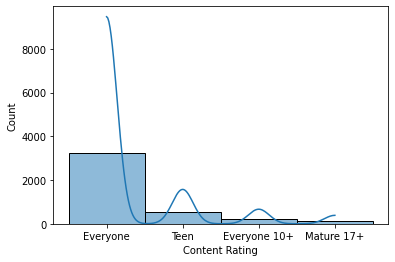

In [27]:
sns.histplot(data=data,x=',kde=True)

In [35]:
data['Category'].value_counts()

Others                 1288
FAMILY                  732
GAME                    458
TOOLS                   304
FINANCE                 152
MEDICAL                 151
HEALTH_AND_FITNESS      139
LIFESTYLE               138
SPORTS                  130
PRODUCTIVITY            128
PHOTOGRAPHY             119
BUSINESS                117
PERSONALIZATION         117
COMMUNICATION            95
BOOKS_AND_REFERENCE      85
Name: Category, dtype: int64

In [46]:
data.groupby(['Content Rating', 'Category'])['Rating'].mean()

Content Rating  Category           
Everyone        BOOKS_AND_REFERENCE    4.390141
                BUSINESS               4.179091
                COMMUNICATION          3.989535
                FAMILY                 4.200000
                FINANCE                4.115385
                GAME                   4.281356
                HEALTH_AND_FITNESS     4.258678
                LIFESTYLE              4.101653
                MEDICAL                4.138971
                Others                 4.204821
                PERSONALIZATION        4.295050
                PHOTOGRAPHY            4.074074
                PRODUCTIVITY           4.134483
                SPORTS                 4.232479
                TOOLS                  3.994077
Everyone 10+    BOOKS_AND_REFERENCE    4.450000
                FAMILY                 4.200000
                GAME                   4.337736
                HEALTH_AND_FITNESS     4.300000
                LIFESTYLE              1.800000
    

In [40]:
data.shape

(4153, 12)

In [37]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

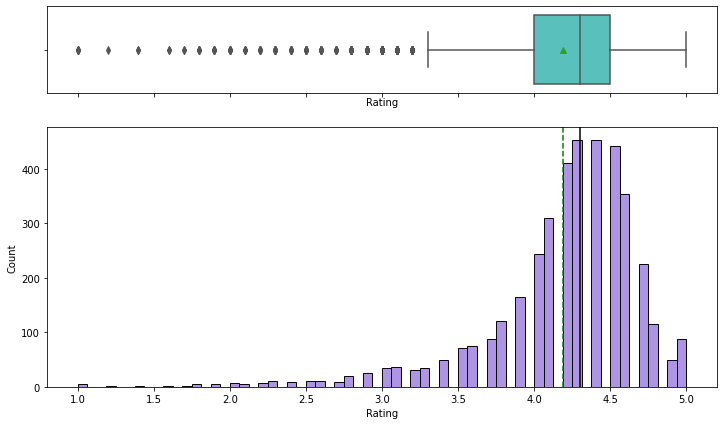

In [47]:
histogram_boxplot(data,'Rating')

In [48]:
df=data.copy()

In [52]:
#Imputing Nulls with mean in Rating
df['Rating']=df.groupby(['Content Rating','Category'])['Rating'].transform(lambda x: x.fillna(x.mean()))

In [55]:
df['Reviews']=df.groupby(['Category','Content Rating'])['Reviews'].transform(lambda x: x.fillna(x.mean()))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            4153 non-null   float64
 3   Reviews           4153 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB
